<a href="https://colab.research.google.com/github/SteffanBurnette/TensorFlow-/blob/Testing_out_regression_neural_network_for_predicting_direction_of_future_stock_price/Stock_price_analysis_test_one.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#The Goal: Create a Regression neureal network that will be able to predict the future price of a stock when given the following metrics:
* **Opening Price** - The price that the security started the day as.
* **High** - The highest price of the security for the day.
* **Low** - The lowest price of the security for the day.
* **Closing price** - The price of the security when the market closes.
* **Trading Volume** - The total quantity of shares or contracts traded for a specified security.

When preparing the data, I think it would be best to **normalize** it since i still want to keep the proper distributions intact, but the put all values within the same range so that the model can make more precise decisions.

**Normalization** - Changing the values of the numerical columns in the dataset to a common scale, without distorting differences in the ranges of values.

##Steps to take to train the network:
1. Use a **pandas DataFrame** to load in the data (or yahoo finance API depending on what I find to be better).
2. Properly define the **Features** and **Labels** so that I know what values to feed into the neural network and what value(s) I should be recieving.
3. **Normalize** the dataset so that all numbers encompass the same range but keep the distribution difference (might not need to use the **OneHotEncoder** since there isnt a non numerical column and will only used the **MinMaxScaler** for data **Normalization**).
4. Split the dataset up into **Training** and **Testing** datasets, so that the model doesnt just get use to solving the same problems( So that we **Generalize** the neural network).
5. Test out different **Optimizers** (mainly **Stochastic Gradient Descent(SGD)** and **Adam**) and experiment with the learning rate(Find the optimal learning rate by plotting the **loss curve**).
6. Test out different training lengths (**epochs**).
7. Test out creating different amounts of **layers** and **Nuerons**(Maybe try out the **linear activation function** but most likely wont contribute anything to the project).
8. Evlaute the performace of the model to keep track of improvement.
9. Test the model to make future predictions (Maybe on older values where we know the outcome, then current values and compare them with the true values the next day (does **predictions**==**Actual Values**)).
10. Save the model for use in future projects if everything works as expected.

###The STONK that shall be analyzed is dodge boi TESLA

In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import make_column_transformer

Will Be working on 758 clolumns of tesla stock data ranging from the start date of october 15th 2015 to october 15th 2018; Three years of stock data

**Columns: date, close, volume, open, high and low**

In [ ]:
#Preparing the data
tesla = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/tesla-stock-price.csv")
tesla.head()
#Changes the volume column from string to float
tesla["volume"] = tesla["volume"].str.replace(',', '').astype(float)

#This will be the features that the model will take in
tesla_X = tesla[["open", "high", "low", "volume"]]
print(tesla_X)

#This will be the labels that the model will try to predict
tesla_y = tesla[["close"]]
print(tesla_y)

tesla_X_train, tesla_X_test, tesla_y_train, tesla_y_test = train_test_split(tesla_X, tesla_y, test_size=0.2, random_state=42)

print(tesla_X_train.dtypes)

#Create the object that will normalize the data
ct = MinMaxScaler()

#Normalizes the training and testing data for the features and labels
ct.fit(tesla_X_train)
tesla_X_train_norm = ct.transform(tesla_X_train)

ct.fit(tesla_X_test)
tesla_X_test_norm = ct.transform(tesla_X_test)

ct.fit(tesla_y_train)
tesla_y_train_norm = ct.transform(tesla_y_train)

ct.fit(tesla_y_test)
tesla_y_test_norm = ct.transform(tesla_y_test)


print(f"this is the data {tesla_X_train_norm}")
print(f"\n this is the single point in data {tesla_X_train_norm[0]} and  the shape is {tesla_X_train_norm[0].shape}")

       open      high       low      volume
0    264.50  273.8800  262.2400   4787699.0
1    259.06  263.2800  254.5367   6189026.0
2    261.00  261.9900  252.0100   7189257.0
3    257.53  262.2500  249.0300   8128184.0
4    264.61  265.5100  247.7700  12781560.0
..      ...       ...       ...         ...
752  211.99  214.8100  208.8000   4177956.0
753  227.72  228.6000  202.0000  14877020.0
754  226.50  231.1500  224.9400   2506836.0
755  223.04  230.4805  222.8700   4327574.0
756  216.43  221.7300  213.7000   2835920.0

[757 rows x 4 columns]
      close
0    270.49
1    259.59
2    258.78
3    252.23
4    256.88
..      ...
752  210.09
753  213.03
754  228.10
755  227.01
756  221.31

[757 rows x 1 columns]
open      float64
high      float64
low       float64
volume    float64
dtype: object
this is the data [[0.76985718 0.79470678 0.79863077 0.24341806]
 [0.74575439 0.7360514  0.75286312 0.26537162]
 [0.45296067 0.43645585 0.46363521 0.08984735]
 ...
 [0.94397839 0.95158115 0.97206

Now that I have prepared the data to be properly passed to the neural network its time to create the neural network and train the model to make predictions on the data.

In [ ]:
#Set the seed for reproducibility
tf.random.set_seed(42)

#1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2. Compile the Model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

#3. Fit the model
model.fit(tesla_X_train_norm, tesla_y_train_norm, epochs = 100)

Epoch 1/100
19/19 [==============================] - 1s 2ms/step - loss: 0.2213 - mae: 0.2213
Epoch 2/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0571 - mae: 0.0571
Epoch 3/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0698 - mae: 0.0698
Epoch 4/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0730 - mae: 0.0730
Epoch 5/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0676 - mae: 0.0676
Epoch 6/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0679 - mae: 0.0679
Epoch 7/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0698 - mae: 0.0698
Epoch 8/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0691 - mae: 0.0691
Epoch 9/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0659 - mae: 0.0659
Epoch 10/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0693 - mae: 0.0693
Epoch 11/100
19/19 [==============================] - 0s 1m

#Now lets evaluate the models performance and have it perform predictions

In [ ]:
#Evaluate the models performance
model.evaluate(tesla_X_test_norm, tesla_y_test_norm)

5/5 [==============================] - 0s 2ms/step - loss: 0.0217 - mae: 0.0217


[0.0216848012059927, 0.0216848012059927]

Now lets perform a prediction with the model

In [ ]:
y_preds = model.predict(tesla_X_test_norm)
print(y_preds)
#print(tesla_y_test_norm)

5/5 [==============================] - 0s 2ms/step
[[0.44376698]
 [0.6141335 ]
 [0.8905855 ]
 [0.2351066 ]
 [0.38756248]
 [0.8247474 ]
 [0.63711995]
 [0.68583286]
 [0.8423107 ]
 [0.22538745]
 [0.7409962 ]
 [0.3481288 ]
 [0.31492582]
 [0.3261777 ]
 [0.6776508 ]
 [0.99387985]
 [0.90933526]
 [0.2890571 ]
 [0.6854939 ]
 [0.269133  ]
 [0.7555092 ]
 [0.10012738]
 [0.44200182]
 [0.85822046]
 [0.3035989 ]
 [0.4463897 ]
 [0.67094564]
 [0.73836815]
 [0.20183063]
 [0.8448958 ]
 [0.16108754]
 [0.45366567]
 [0.78488827]
 [0.5813505 ]
 [0.69832003]
 [0.26454967]
 [0.7190632 ]
 [0.31210026]
 [0.35872993]
 [0.36000645]
 [0.2565409 ]
 [0.63064843]
 [0.73057747]
 [0.8385634 ]
 [0.27514574]
 [0.4579083 ]
 [0.37953347]
 [0.73687047]
 [0.2803567 ]
 [0.3131518 ]
 [0.7008521 ]
 [0.29660222]
 [0.8656379 ]
 [0.25005305]
 [0.86088103]
 [0.16330558]
 [0.85126984]
 [0.23339973]
 [0.03227162]
 [0.7105383 ]
 [0.9018708 ]
 [0.92371565]
 [0.6726844 ]
 [0.27875146]
 [0.4486321 ]
 [0.505076  ]
 [0.82368535]
 [0.8439173

The prediction are not quite the same as the true values even thought the mae metrioc is 0.02. Will create a new model with the adam optimizer to see if there is any improvement.

Will also train the model for longer and leave the layers alone for this iteration.

In [ ]:
#Set the seed for reproducibility
tf.random.set_seed(42)

#1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2. Compile the Model
model_2.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.1),
              metrics=["mae"])

#3. Fit the model
history_2 = model_2.fit(tesla_X_train_norm, tesla_y_train_norm, epochs = 200)

Epoch 1/200
19/19 [==============================] - 1s 2ms/step - loss: 1.2727 - mae: 1.2727
Epoch 2/200
19/19 [==============================] - 0s 1ms/step - loss: 0.2075 - mae: 0.2075
Epoch 3/200
19/19 [==============================] - 0s 2ms/step - loss: 0.1527 - mae: 0.1527
Epoch 4/200
19/19 [==============================] - 0s 1ms/step - loss: 0.0697 - mae: 0.0697
Epoch 5/200
19/19 [==============================] - 0s 1ms/step - loss: 0.0354 - mae: 0.0354
Epoch 6/200
19/19 [==============================] - 0s 1ms/step - loss: 0.0262 - mae: 0.0262
Epoch 7/200
19/19 [==============================] - 0s 1ms/step - loss: 0.0280 - mae: 0.0280
Epoch 8/200
19/19 [==============================] - 0s 2ms/step - loss: 0.0254 - mae: 0.0254
Epoch 9/200
19/19 [==============================] - 0s 1ms/step - loss: 0.0287 - mae: 0.0287
Epoch 10/200
19/19 [==============================] - 0s 2ms/step - loss: 0.0384 - mae: 0.0384
Epoch 11/200
19/19 [==============================] - 0s 2m

In [ ]:
model_2.evaluate(tesla_X_test_norm, tesla_y_test_norm)

5/5 [==============================] - 0s 3ms/step - loss: 0.0126 - mae: 0.0126


[0.012555108405649662, 0.012555108405649662]

In [ ]:
y_preds_2 = model_2.predict(tesla_X_test_norm)
#un-normalizes the output values
y_preds_2_unnorm = ct.inverse_transform(model_2.predict(tesla_X_test_norm))
#print(y_preds_2 == tesla_y_test_norm )
print(y_preds_2_unnorm)
print( tesla_y_test)

5/5 [==============================] - 0s 2ms/step
[[252.64156]
 [293.9004 ]
 [351.95917]
 [205.13486]
 [240.53825]
 [337.1643 ]
 [297.21368]
 [304.79947]
 [335.00867]
 [201.25069]
 [323.58282]
 [233.67511]
 [222.38356]
 [225.71855]
 [306.83957]
 [376.20306]
 [360.81897]
 [216.04971]
 [306.13477]
 [212.97069]
 [325.78876]
 [174.17554]
 [253.34697]
 [344.38947]
 [218.98557]
 [252.82784]
 [306.84378]
 [318.06308]
 [196.91771]
 [344.83026]
 [189.33182]
 [253.3211 ]
 [330.919  ]
 [285.09018]
 [311.80948]
 [208.60725]
 [312.6906 ]
 [221.44257]
 [231.73349]
 [235.02457]
 [211.17877]
 [297.64706]
 [316.6948 ]
 [341.88522]
 [212.16408]
 [255.10878]
 [236.21388]
 [321.816  ]
 [213.75531]
 [212.06918]
 [309.33093]
 [219.39435]
 [348.35858]
 [209.19563]
 [350.06592]
 [189.71912]
 [345.77832]
 [204.512  ]
 [159.6236 ]
 [308.15704]
 [358.7288 ]
 [356.57065]
 [304.6649 ]
 [215.40062]
 [252.53099]
 [262.47818]
 [339.40237]
 [338.23822]
 [212.89348]
 [368.27896]
 [313.10358]
 [221.3158 ]
 [234.86057]


After inversing the predictions i realized that the predicted values are higher than the actual values by 2. After making this discovery i will make the bias more complex and try to remove any biases.

In [ ]:
#Set the seed for reproducibility
tf.random.set_seed(42)

#1. Create the model, this time with more neurons and an activaton function
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="linear") # Output layer for regression
])

#2. Compile the model, Will keep using adam with a learning rate of 0.01
model_3.compile(loss= tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics = ["mae"])

#3. Fit the model to the normalized data
model_3.fit(tesla_X_train_norm, tesla_y_train_norm, epochs=100)

Epoch 1/100
19/19 [==============================] - 1s 2ms/step - loss: 0.0704 - mae: 0.0704
Epoch 2/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0212 - mae: 0.0212
Epoch 3/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0167 - mae: 0.0167
Epoch 4/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0143 - mae: 0.0143
Epoch 5/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0179 - mae: 0.0179
Epoch 6/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0327 - mae: 0.0327
Epoch 7/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0225 - mae: 0.0225
Epoch 8/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0149 - mae: 0.0149
Epoch 9/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0211 - mae: 0.0211
Epoch 10/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0161 - mae: 0.0161
Epoch 11/100
19/19 [==============================] - 0s 2m

In [ ]:
#Evaluate the model
model_3.evaluate(tesla_X_test_norm, tesla_y_test_norm)

5/5 [==============================] - 0s 2ms/step - loss: 0.0126 - mae: 0.0126


[0.012571744620800018, 0.012571744620800018]

In [ ]:
y_preds_3_unnorm = ct.inverse_transform(model_3.predict(tesla_X_test_norm))

print(y_preds_3_unnorm, tesla_y_test)

In [ ]:
#Will see if the model works on current tesla stock data

#open->high->low->volume

# Initialize the scaler
ctx = MinMaxScaler()

# Assuming 'train_data' is your training data used to fit the model
# It should be a NumPy array or similar structure with shape (num_samples, num_features)
# ctx.fit(train_data)
ctx.fit(tesla_X_train)
# Your prediction data
yfin = np.array([236.86, 240.12, 234.90, 92379400]).reshape(1, 4)

# Normalize the prediction data using the already fitted scaler
yfin_norm = ctx.transform(yfin)

# Predict using the model
current_pred_norm = model_3.predict(yfin_norm)

# Inverse transform the prediction
current_pred = ctx.inverse_transform(current_pred_norm)

print(f"This is the current prediction: {current_pred}")

1/1 [==============================] - 0s 15ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


ValueError: non-broadcastable output operand with shape (1,1) doesn't match the broadcast shape (1,4)

In [ ]:
model_3.predict(tesla_X_test_norm[1])

###Turns out that theres more to take into account were trying to forecast stock performance.
The following code is from a tutorila on using Long Short term memory neural networks to predict microsoft stock prices to help gain a better understanding of what it takes to create a nueral network to analyze and predict future stock prices

In [ ]:
import datetime
df = pd.read_csv("MSFT.csv")
#Discarding all other columns
df = df[["Date", "Close"]]

#rightnow our date is a string so we will need to convert it
#This is a function that converts the datetime values to int
def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)


#Will execute the function oin nevery column in the dataframe
df["Date"] = df["Date"].apply(str_to_datetime)
#Removes the date column and makes it the index
df.index = df.pop("Date")

print(df)

                 Close
Date                  
1986-03-13    0.097222
1986-03-14    0.100694
1986-03-17    0.102431
1986-03-18    0.099826
1986-03-19    0.098090
...                ...
2023-12-29  376.040009
2024-01-02  370.869995
2024-01-03  370.600006
2024-01-04  367.940002
2024-01-05  367.750000

[9531 rows x 1 columns]


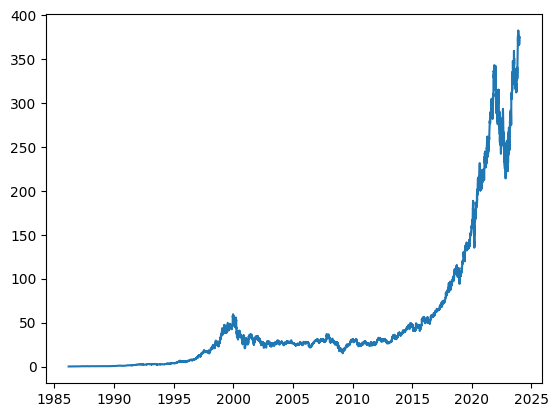

In [ ]:
#Plot to visdualize the current data
plt.plot(df.index, df["Close"])

Since we are using **LSTM** we need to convert this into a supervised problem.

In [ ]:
def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df,
                                '2021-03-25',
                                '2022-03-23',
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-03-25,235.990005,237.580002,235.460007,232.339996
1,2021-03-26,237.580002,235.460007,232.339996,236.479996
2,2021-03-29,235.460007,232.339996,236.479996,235.240005
3,2021-03-30,232.339996,236.479996,235.240005,231.850006
4,2021-03-31,236.479996,235.240005,231.850006,235.770004
...,...,...,...,...,...
247,2022-03-17,276.440002,287.149994,294.390015,295.220001
248,2022-03-18,287.149994,294.390015,295.220001,300.429993
249,2022-03-21,294.390015,295.220001,300.429993,299.160004
250,2022-03-22,295.220001,300.429993,299.160004,304.059998
